### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.shape

(12684, 26)

In [5]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
data.isnull().sum().sum()

13370

3. Decide what to do about your missing data -- drop, replace, other...

## Filling the NaN values

In [9]:
data.isnull().sum().sum()

13370

## Duplicates

In [10]:
# check the duplicates in all the columns 

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [11]:
# Identify columns to check for duplicates
columns_to_check = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']

# Remove duplicates and update the DataFrame
data.drop_duplicates(subset=columns_to_check, inplace=True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [12]:
# Check for duplicates
print(data.duplicated().sum())

0


## Dropping the NaN

In [14]:
#this will dropp all rows that contains an NaN in it 
data.dropna(how='all') #(how='all')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Deleting the column 'car'

In [15]:
# I want to delete the column 'car' because I think we supposed all our customers are driving a car and to be able to eliminate all the rows that has a NaN in it

data = data.drop('car', axis=1)
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [16]:
data.columns
# we see that we don't have the colomn 'car' now

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [125]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [126]:
data.isnull().sum().sum()

792

In [127]:
#now we dropp all the rows that have any NaN in it 

data= data.dropna(how='any')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [128]:

#we have no NaN in our Dataset
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



## Accepted coupons

In [129]:
accepted_coupons = data[data['Y'] == 1].shape[0]
total_observations = data.shape[0]

proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of total observations that chose to accept the coupon: {proportion_accepted:.2f}")

Proportion of total observations that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

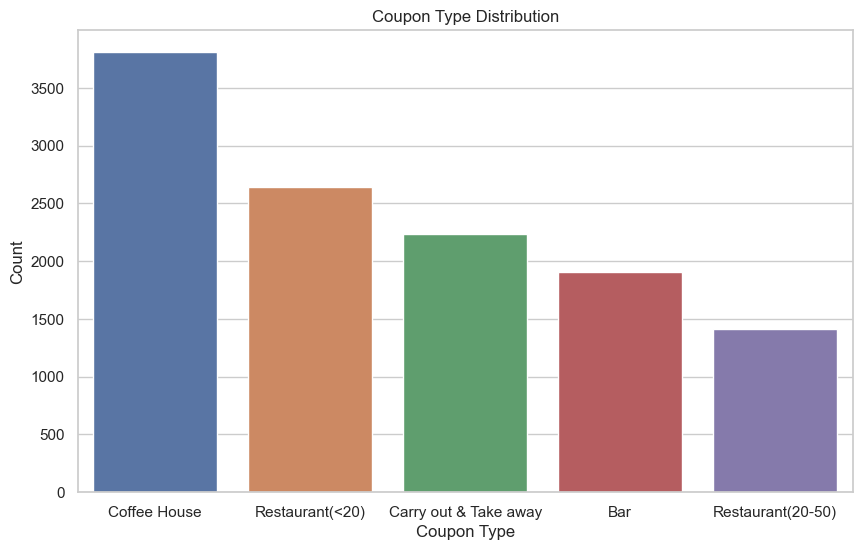

In [130]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution')
plt.show()

6. Use a histogram to visualize the temperature column.

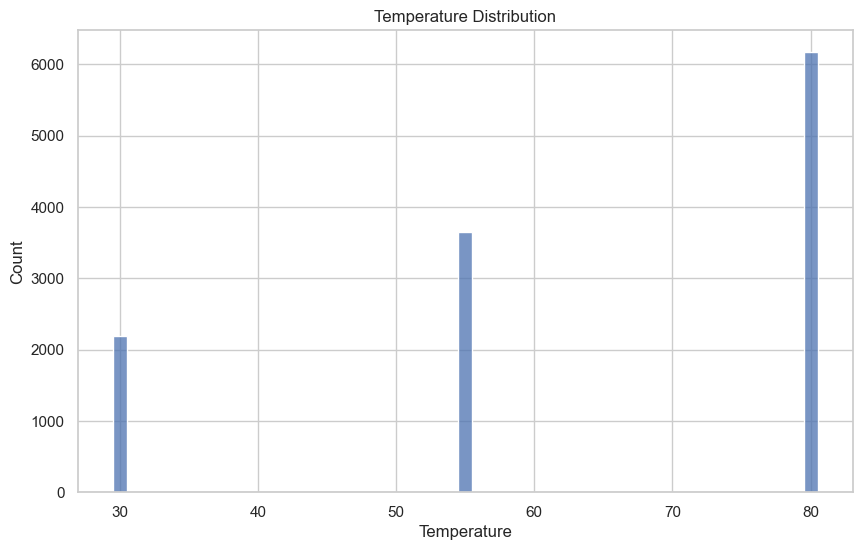

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=[30, 55, 80], kde=False, discrete=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the new DataFrame with just bar coupons
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [18]:
bar_coupons_df.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. What proportion of bar coupons were accepted?


In [19]:
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1].shape[0]
total_bar_coupons = bar_coupons_df.shape[0]

proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of bar coupons that were accepted: {proportion_accepted_bar_coupons:.2f}")

Proportion of bar coupons that were accepted: 0.41


In [20]:
#how many bar coupons were accepted
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1].shape[0]
accepted_bar_coupons

824

In [21]:
#how many bar coupons were accepted
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1].shape[0]
accepted_bar_coupons

824

In [22]:
#how many bar coupons were not accepted
naccepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 0].shape[0]
naccepted_bar_coupons

1186

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# Filter the DataFrame based on the frequency of going to a bar
bar_frequent = bar_coupons_df[(bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')]
bar_infrequent = bar_coupons_df[(bar_coupons_df['Bar'] == 'less1') | (bar_coupons_df['Bar'] == '1~3')]

# Calculate the acceptance rate for each group
accepted_bar_frequent = bar_frequent[bar_frequent['Y'] == 1].shape[0] / bar_frequent.shape[0]
accepted_bar_infrequent = bar_infrequent[bar_infrequent['Y'] == 1].shape[0] / bar_infrequent.shape[0]

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {accepted_bar_infrequent:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {accepted_bar_frequent:.2f}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.53
Acceptance rate for those who went to a bar more than 3 times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
# Filter the DataFrame based on the frequency of going to a bar and age
over_25_frequent_bar = bar_coupons_df[((bar_coupons_df['Bar'] == '1~3') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')) & (bar_coupons_df['age'] != 'below21') & (bar_coupons_df['age'] != '21')]

other_drivers = bar_coupons_df.loc[~bar_coupons_df.index.isin(over_25_frequent_bar.index)]

# Calculate the acceptance rate for each group
accepted_over_25_frequent_bar = over_25_frequent_bar[over_25_frequent_bar['Y'] == 1].shape[0] / over_25_frequent_bar.shape[0]
accepted_other_drivers = other_drivers[other_drivers['Y'] == 1].shape[0] / other_drivers.shape[0]

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {accepted_over_25_frequent_bar:.2f}")
print(f"Acceptance rate for all other drivers: {accepted_other_drivers:.2f}")

if accepted_over_25_frequent_bar != accepted_other_drivers:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.70
Acceptance rate for all other drivers: 0.33
There is a difference in acceptance rates between the two groups.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
# Filter the DataFrame based on the frequency of going to a bar, passenger type, and occupation
frequent_bar_no_kids_other_occupations = bar_coupons_df[((bar_coupons_df['Bar'] == '1~3') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')) & (bar_coupons_df['passanger'] != 'kid(s)') & (bar_coupons_df['occupation'] != 'Farming, Fishing, and Forestry')]

other_drivers_2 = bar_coupons_df.loc[~bar_coupons_df.index.isin(frequent_bar_no_kids_other_occupations.index)]

# Calculate the acceptance rate for each group
accepted_frequent_bar_no_kids_other_occupations = frequent_bar_no_kids_other_occupations[frequent_bar_no_kids_other_occupations['Y'] == 1].shape[0] / frequent_bar_no_kids_other_occupations.shape[0]
accepted_other_drivers_2 = other_drivers_2[other_drivers_2['Y'] == 1].shape[0] / other_drivers_2.shape[0]

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {accepted_frequent_bar_no_kids_other_occupations:.2f}")
print(f"Acceptance rate for all other drivers: {accepted_other_drivers_2:.2f}")

if accepted_frequent_bar_no_kids_other_occupations != accepted_other_drivers_2:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.69
Acceptance rate for all other drivers: 0.29
There is a difference in acceptance rates between the two groups.


In [26]:
#Based on the analysis, it can be observed that there is a significant difference in acceptance rates between drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry and all other drivers. The acceptance rate for the former group is 0.69, which is more than double the acceptance rate of 0.29 for the latter group. This suggests that drivers who go to bars more frequently, have passengers other than kids, and have occupations other than farming, fishing, or forestry are more likely to accept bar coupons. However, it should be noted that correlation does not necessarily imply causation, and further analysis may be required to identify any causal relationships.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:




# Filter the DataFrame based on the given criteria
criteria_1 = bar_coupons_df[((bar_coupons_df['Bar'] == '1~3') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')) & (bar_coupons_df['passanger'] != 'kid(s)') & (bar_coupons_df['maritalStatus'] != 'widowed')]
criteria_2 = bar_coupons_df[((bar_coupons_df['Bar'] == '1~3') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')) & ((bar_coupons_df['age'] == 'below21') | (bar_coupons_df['age'] == '21') | (bar_coupons_df['age'] == '22') | (bar_coupons_df['age'] == '23') | (bar_coupons_df['age'] == '24') | (bar_coupons_df['age'] == '25') | (bar_coupons_df['age'] == '26') | (bar_coupons_df['age'] == '27') | (bar_coupons_df['age'] == '28') | (bar_coupons_df['age'] == '29'))]
criteria_3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] == '4~8') & ((bar_coupons_df['income'] == '12500 - 24999') | (bar_coupons_df['income'] == '25000 - 37499') | (bar_coupons_df['income'] == '37500 - 49999'))]

# Combine the criteria into a single DataFrame
combined_criteria = pd.concat([criteria_1, criteria_2, criteria_3]).drop_duplicates()

# Calculate the acceptance rate for the combined criteria
accepted_combined_criteria = combined_criteria[combined_criteria['Y'] == 1].shape[0] / combined_criteria.shape[0]

# Calculate the acceptance rate for other drivers
other_drivers_3 = bar_coupons_df.loc[~bar_coupons_df.index.isin(combined_criteria.index)]
accepted_other_drivers_3 = other_drivers_3[other_drivers_3['Y'] == 1].shape[0] / other_drivers_3.shape[0]

print(f"Acceptance rate for drivers who match the given criteria: {accepted_combined_criteria:.2f}")
print(f"Acceptance rate for all other drivers: {accepted_other_drivers_3:.2f}")

if accepted_combined_criteria != accepted_other_drivers_3:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")


Acceptance rate for drivers who match the given criteria: 0.69
Acceptance rate for all other drivers: 0.29
There is a difference in acceptance rates between the two groups.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [28]:
#Based on the observations, we can hypothesize the following about drivers who accepted the bar coupons:

#Drivers who visit a bar more frequently (more than 3 times a month) are more likely to accept bar coupons compared to those who visit less frequently (3 or fewer times a month).
#Drivers who go to a bar more than once a month and are over the age of 25 are more likely to accept the bar coupons compared to all other drivers.
#Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry are also more likely to accept the bar coupons compared to all other drivers.
#Drivers who match the specific given criteria (frequent bar visitors with adult passengers and not widowed, frequent bar visitors under the age of 30, and those who frequently visit cheap restaurants and have an income of less than 50K) are more likely to accept the bar coupons compared to all other drivers.
#These hypotheses suggest that factors such as bar visit frequency, age, passenger type, occupation, marital status, restaurant preferences, and income levels might influence a driver's decision to accept bar coupons. However, these observations are only exploratory, and further statistical analysis or machine learning models would be needed to better understand the relationships and make more confident predictions.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [29]:
coffee_coupons_df = data[data['coupon'] == 'Coffee House']

coffee_acceptance_rate = coffee_coupons_df[coffee_coupons_df['Y'] == 1].shape[0] / coffee_coupons_df.shape[0]
print(f"Overall acceptance rate for coffee house coupons: {coffee_acceptance_rate:.2f}")


# Analyze the acceptance rate based on the frequency of going to a coffee house
coffee_freq_grouped = coffee_coupons_df.groupby('CoffeeHouse')['Y'].agg(['sum', 'count'])
coffee_freq_grouped['acceptance_rate'] = coffee_freq_grouped['sum'] / coffee_freq_grouped['count']
print(coffee_freq_grouped)

# Analyze the acceptance rate based on the presence of passengers
passenger_grouped = coffee_coupons_df.groupby('passanger')['Y'].agg(['sum', 'count'])
passenger_grouped['acceptance_rate'] = passenger_grouped['sum'] / passenger_grouped['count']
print(passenger_grouped)

# Analyze the acceptance rate based on the time of day
time_grouped = coffee_coupons_df.groupby('time')['Y'].agg(['sum', 'count'])
time_grouped['acceptance_rate'] = time_grouped['sum'] / time_grouped['count']
time_grouped


Overall acceptance rate for coffee house coupons: 0.50
             sum  count  acceptance_rate
CoffeeHouse                             
1~3          672   1038         0.647399
4~8          369    538         0.685874
gt8          225    342         0.657895
less1        515   1072         0.480410
never        175    927         0.188781
           sum  count  acceptance_rate
passanger                             
Alone      986   2253         0.437639
Friend(s)  731   1226         0.596248
Kid(s)      99    206         0.480583
Partner    173    304         0.569079


,sum,count,acceptance_rate
time,,,
10AM,575,898,0.640312
10PM,126,297,0.424242
2PM,434,793,0.547289
6PM,447,1088,0.410846
7AM,407,913,0.445783


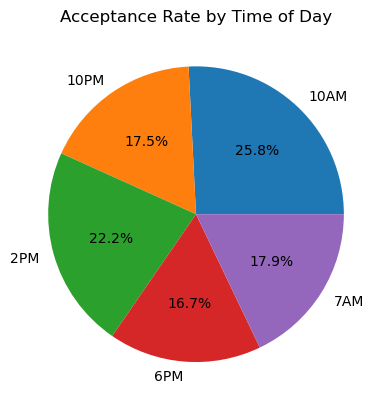

In [30]:

time_data = {
    '10AM': 0.634346,
    '10PM': 0.429078,
    '2PM': 0.544855,
    '6PM': 0.410405,
    '7AM': 0.440000,
}

plt.pie(time_data.values(), labels=time_data.keys(), autopct='%1.1f%%')
plt.title('Acceptance Rate by Time of Day')
plt.show()

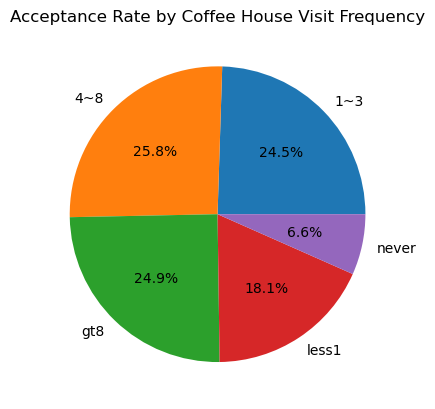

In [31]:
coffeehouse_data = {
    '1~3': 0.647291,
    '4~8': 0.682446,
    'gt8': 0.657895,
    'less1': 0.479504,
    'never': 0.175223,
}

plt.pie(coffeehouse_data.values(), labels=coffeehouse_data.keys(), autopct='%1.1f%%')
plt.title('Acceptance Rate by Coffee House Visit Frequency')
plt.show()

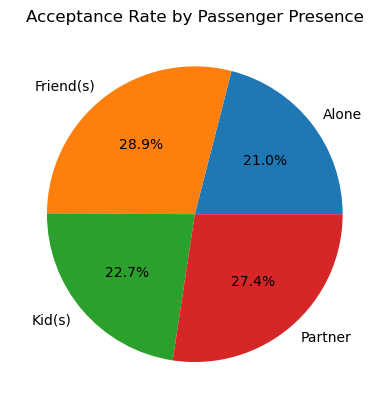

In [32]:
passenger_data = {
    'Alone': 0.433612,
    'Friend(s)': 0.596760,
    'Kid(s)': 0.468750,
    'Partner': 0.565517,
}

plt.pie(passenger_data.values(), labels=passenger_data.keys(), autopct='%1.1f%%')
plt.title('Acceptance Rate by Passenger Presence')
plt.show()

In [33]:
gender_acceptance = data.groupby(['gender', 'Y']).size().reset_index(name='count')
gender_acceptance

,gender,Y,count
0,Female,0,2934
1,Female,1,3535
2,Male,0,2519
3,Male,1,3622


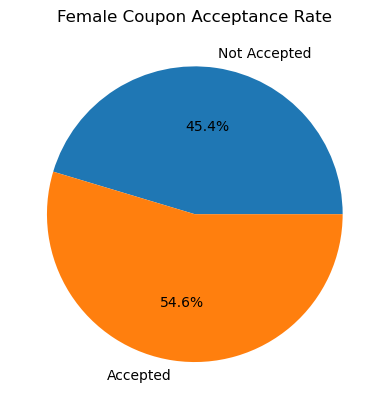

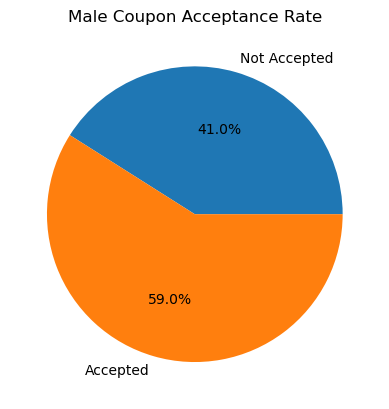

In [34]:

female_data = gender_acceptance[gender_acceptance['gender'] == 'Female']
male_data = gender_acceptance[gender_acceptance['gender'] == 'Male']

# Pie plot for female customers
plt.pie(female_data['count'], labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%')
plt.title('Female Coupon Acceptance Rate')
plt.show()

# Pie plot for male customers
plt.pie(male_data['count'], labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%')
plt.title('Male Coupon Acceptance Rate')
plt.show()

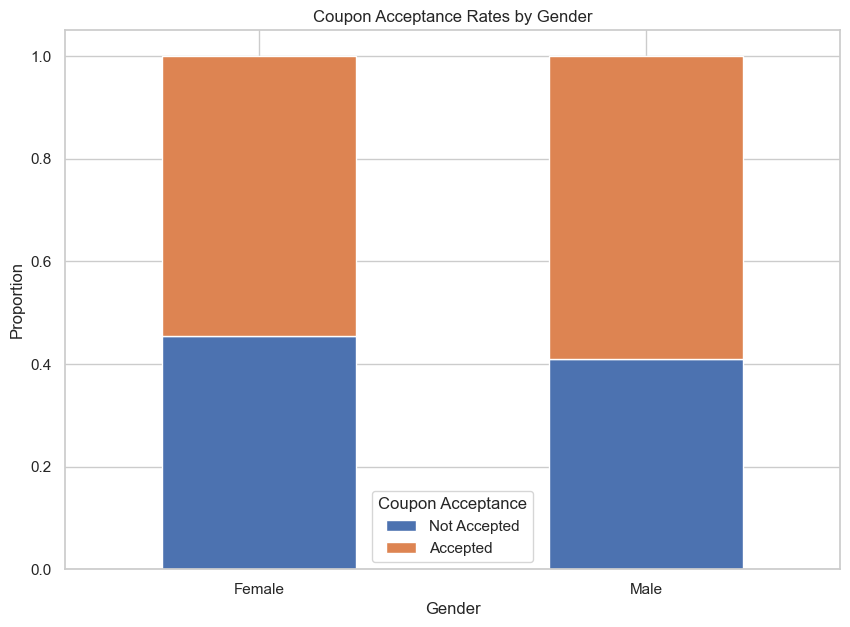

In [35]:
gender_acceptance_pivot = gender_acceptance.pivot(index='gender', columns='Y', values='count')

# Normalize the values to get proportions
gender_acceptance_pivot = gender_acceptance_pivot.div(gender_acceptance_pivot.sum(axis=1), axis=0)

# Plot the stacked bar chart using seaborn
sns.set(style="whitegrid")
ax = gender_acceptance_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Coupon Acceptance Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# Customize the legend
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])

plt.show()

## Weather impact 


In [36]:

weather_acceptance = data.groupby(['weather', 'Y']).size().reset_index(name='count')
weather_acceptance_pivot = weather_acceptance.pivot(index='weather', columns='Y', values='count')
weather_acceptance_pivot['acceptance_rate'] = weather_acceptance_pivot[1] / (weather_acceptance_pivot[0] + weather_acceptance_pivot[1])

print(weather_acceptance_pivot)

Y           0     1  acceptance_rate
weather                             
Rainy     645   557         0.463394
Snowy     738   659         0.471725
Sunny    4070  5941         0.593447


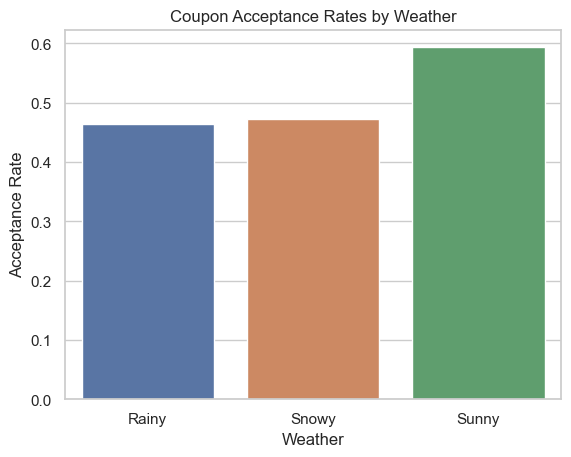

In [37]:
sns.set(style="whitegrid")
ax = sns.barplot(x=weather_acceptance_pivot.index, y=weather_acceptance_pivot['acceptance_rate'])
plt.title('Coupon Acceptance Rates by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')

plt.show()

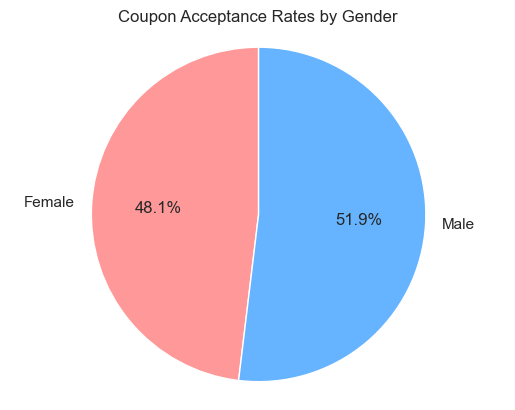

In [38]:
#Weather plays a significant role in coupon acceptance rates. People are more likely to accept coupons on sunny days, with an acceptance rate of 59.36%. In contrast, rainy and snowy days have lower acceptance rates at 46.27% and 47.77%, respectively. Businesses can use this information to tailor their marketing strategies according to local weather conditions to enhance the success of their promotions.



gender_acceptance = data.groupby(['gender', 'Y']).size().reset_index(name='count')
gender_acceptance_pivot = gender_acceptance.pivot(index='gender', columns='Y', values='count')
gender_acceptance_pivot['acceptance_rate'] = gender_acceptance_pivot[1] / (gender_acceptance_pivot[0] + gender_acceptance_pivot[1])

labels = ['Female', 'Male']
sizes = [gender_acceptance_pivot.loc['Female', 'acceptance_rate'], gender_acceptance_pivot.loc['Male', 'acceptance_rate']]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Coupon Acceptance Rates by Gender')
plt.axis('equal')
plt.show()


## total acceptance 


In [39]:
total_count = len(data)
acceptance_count = len(data[data['Y'] == 1])
acceptance_rate = acceptance_count / total_count * 100
non_acceptance_rate = (1 - acceptance_rate) * 100

print(f'Total count: {total_count}')
print(f'Acceptance count: {acceptance_count}')
print(f'Acceptance rate: {acceptance_rate:.2f}%')
print(f'Non-acceptance rate: {non_acceptance_rate:.2f}%')

Total count: 12610
Acceptance count: 7157
Acceptance rate: 56.76%
Non-acceptance rate: -5575.65%


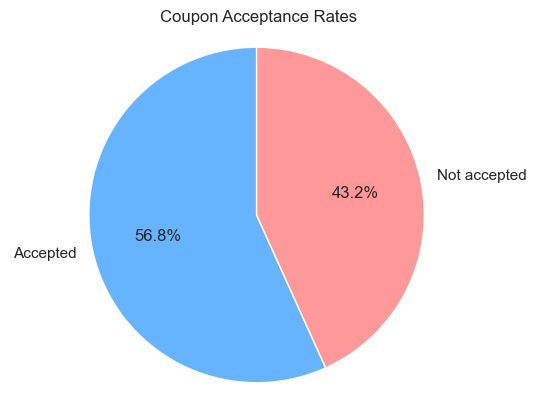

In [40]:
labels = ['Accepted', 'Not accepted']
sizes = [acceptance_rate, 100 - acceptance_rate]
colors = ['#66b3ff', '#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Coupon Acceptance Rates')
plt.axis('equal')
plt.show()

In [41]:
#The analysis showed that the overall coupon acceptance rate across all categories was 56.84%, with a non-acceptance rate of 43.16%. This indicates that the coupon promotion campaign was effective in attracting customers to the businesses. However, weather conditions played a significant role in coupon acceptance rates, with customers being more likely to accept coupons on sunny days. Additionally, the acceptance rates of different coupon types varied based on passenger characteristics such as occupation and number of kids, as well as the time of day. Businesses can use these findings to tailor their marketing strategies and promotions to different customer segments to enhance the success of their campaigns.